# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, yes tail-exclusion train, yes tail-exclusion test, -1 threshold, learning module, cross-validation.

There was a learning fail during CV.

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 18:28:20.635415


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = True
FILTER_TAILS_TRAIN  = True
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = True
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 18:28:23.036938
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 18:28:34.713574
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 748:674 52.60%
Computed class weights: {0: 1.0548961424332344, 1: 0.9505347593582888}
Valid 1:0 174:169 50.73%
FIT


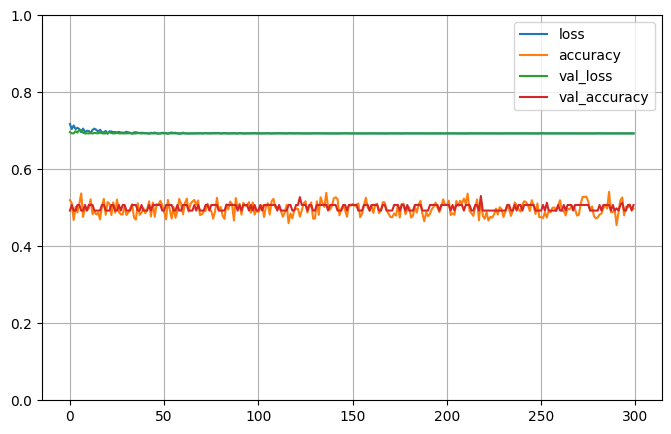


Testing # 1 1
2023-04-29 18:29:58.219204
PREDICT
Test 1:0 174:169 50.73%
Predict 1:0 343:0 100.00%
Test sizes (343, 1025) (343,)
Distrib of scores: 0.50062156 mean 2.9157822e-05 std
Range of scores: 0.50054246 to 0.5007019
Score threshold 0.5
Confusion matrix
 [[  0 169]
 [  0 174]]
Normalized matrix
 [[0.         0.49271137]
 [0.         0.50728863]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


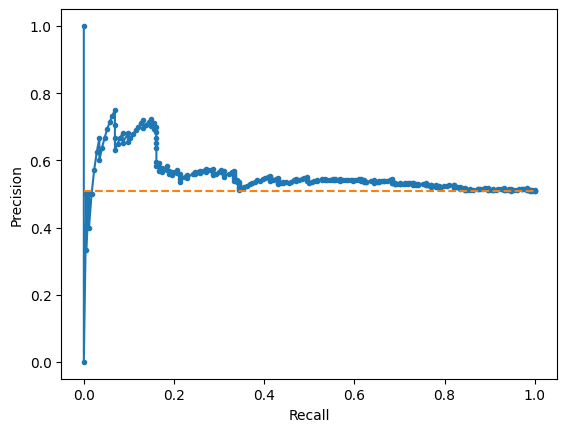

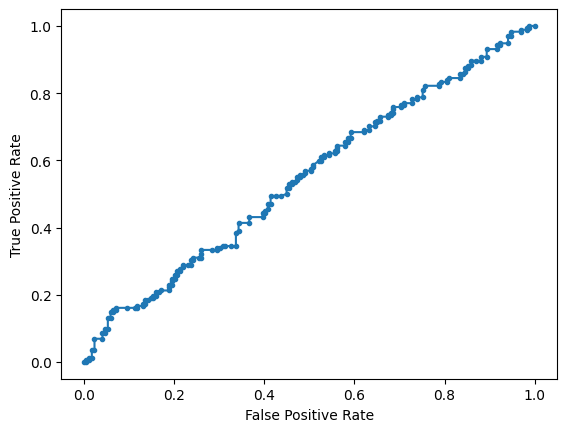

Accuracy: 50.73% Precision: 50.73% Recall: 100.00%
F1: 67.31% MCC: 0.0000
AUPRC: 55.37% AUROC: 54.87%
 accuracy [50.72886297376093]
 precision [50.72886297376093]
 recall [100.0]
 F1 [67.31141199226306]
 MCC [0.0]
 AUPRC [55.36843289844615]
 AUROC [54.87485547167245]

Training # 1 2
2023-04-29 18:29:58.848073
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 741:692 51.71%
Computed class weights: {0: 1.0354046242774566, 1: 0.9669365721997301}
Valid 1:0 181:151 54.52%
FIT


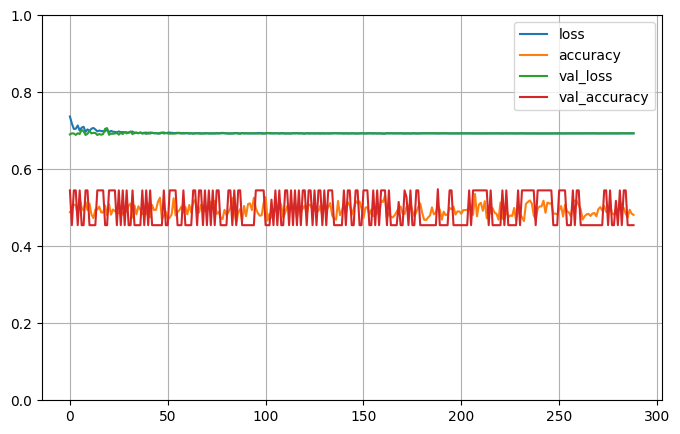


Testing # 1 2
2023-04-29 18:31:09.587133
PREDICT
Test 1:0 181:151 54.52%
Predict 1:0 331:1 99.70%
Test sizes (332, 1025) (332,)
Distrib of scores: 0.500031 mean 1.2194719e-05 std
Range of scores: 0.4999999 to 0.5000698
Score threshold 0.5
Confusion matrix
 [[  1 150]
 [  0 181]]
Normalized matrix
 [[0.00301205 0.45180723]
 [0.         0.54518072]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


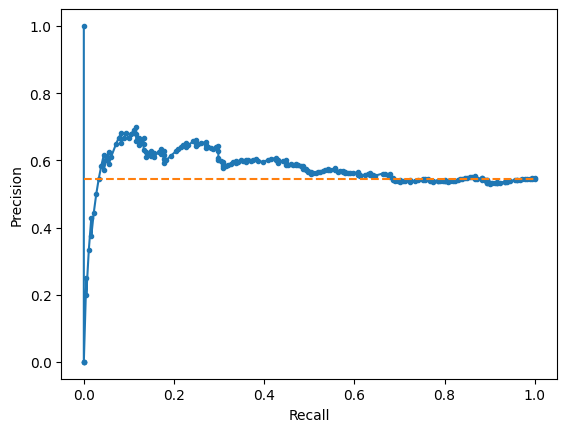

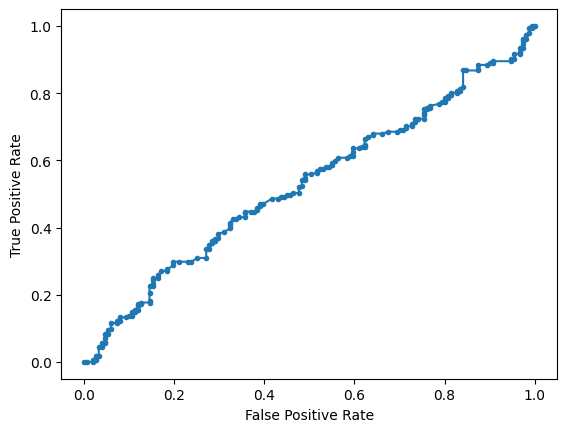

Accuracy: 54.82% Precision: 54.68% Recall: 100.00%
F1: 70.70% MCC: 0.0602
AUPRC: 57.48% AUROC: 52.99%
 accuracy [54.81927710843374]
 precision [54.68277945619335]
 recall [100.0]
 F1 [70.703125]
 MCC [0.06017787070781678]
 AUPRC [57.48029507759084]
 AUROC [52.991108997109514]

Training # 1 3
2023-04-29 18:31:10.131199
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 740:658 52.93%
Computed class weights: {0: 1.0623100303951367, 1: 0.9445945945945946}
Valid 1:0 182:185 49.59%
FIT


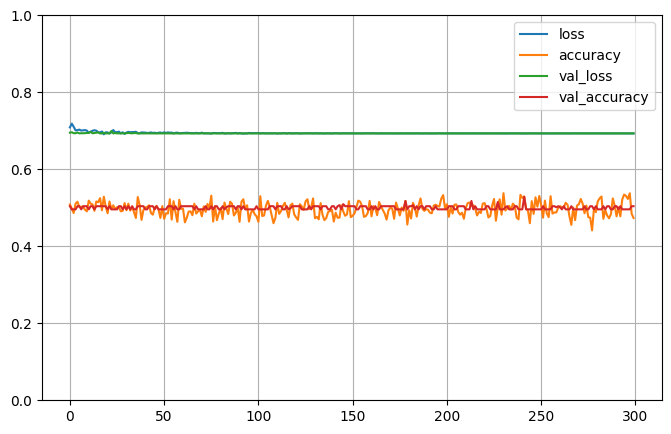


Testing # 1 3
2023-04-29 18:32:33.954176
PREDICT
Test 1:0 182:185 49.59%
Predict 1:0 0:367  0.00%
Test sizes (367, 1025) (367,)
Distrib of scores: 0.49935937 mean 3.830728e-05 std
Range of scores: 0.49926284 to 0.49949187
Score threshold 0.5
Confusion matrix
 [[185   0]
 [182   0]]
Normalized matrix
 [[0.50408719 0.        ]
 [0.49591281 0.        ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


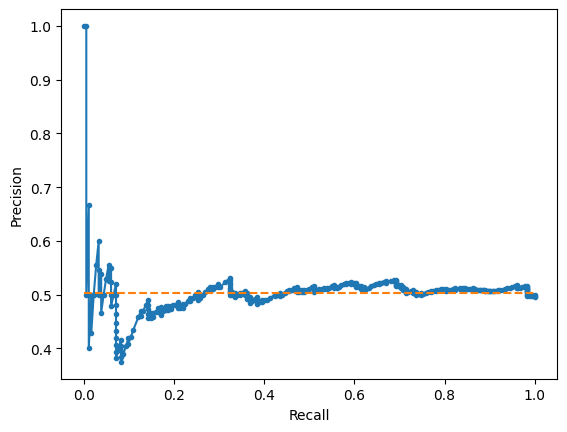

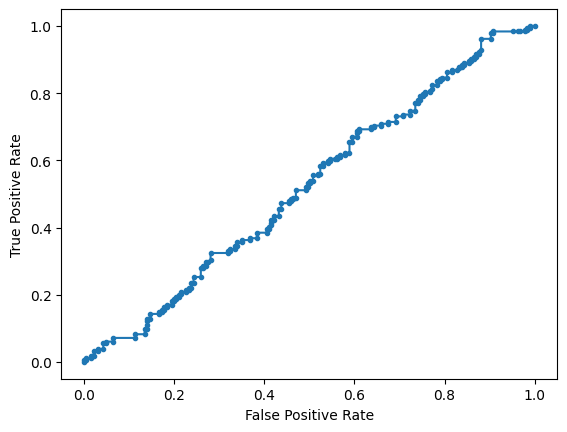

Accuracy: 50.41% Precision: 0.00% Recall: 0.00%
F1: 0.00% MCC: 0.0000
AUPRC: 50.35% AUROC: 52.17%
 accuracy [50.40871934604905]
 precision [0.0]
 recall [0.0]
 F1 [0.0]
 MCC [0.0]
 AUPRC [50.34587124011173]
 AUROC [52.17107217107216]

Training # 1 4
2023-04-29 18:32:34.517066
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 714:679 51.26%
Computed class weights: {0: 1.0257731958762886, 1: 0.9754901960784313}
Valid 1:0 208:164 55.91%
FIT


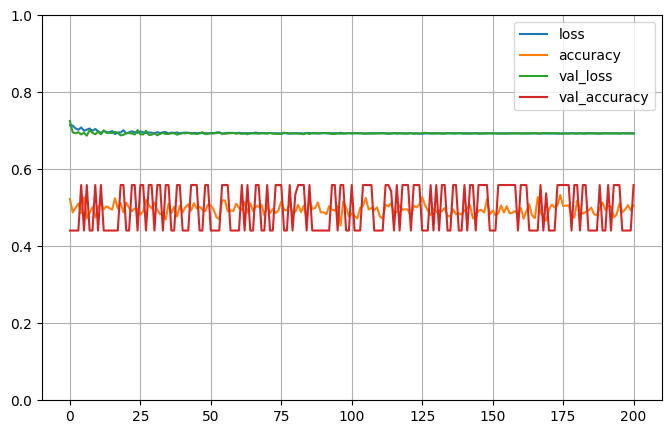


Testing # 1 4
2023-04-29 18:33:58.263168
PREDICT
Test 1:0 208:164 55.91%
Predict 1:0 372:0 100.00%
Test sizes (372, 1025) (372,)
Distrib of scores: 0.5021329 mean 2.1830989e-05 std
Range of scores: 0.50207895 to 0.50221175
Score threshold 0.5
Confusion matrix
 [[  0 164]
 [  0 208]]
Normalized matrix
 [[0.         0.44086022]
 [0.         0.55913978]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


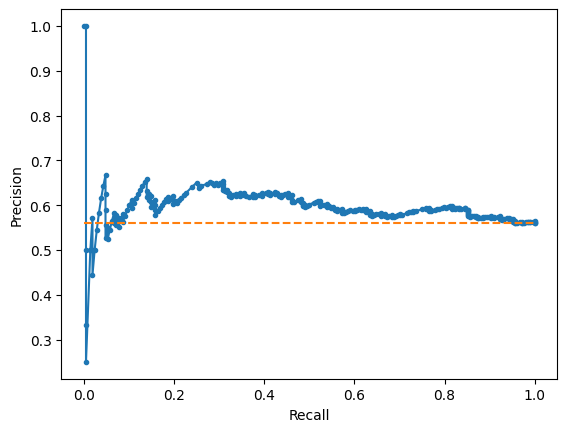

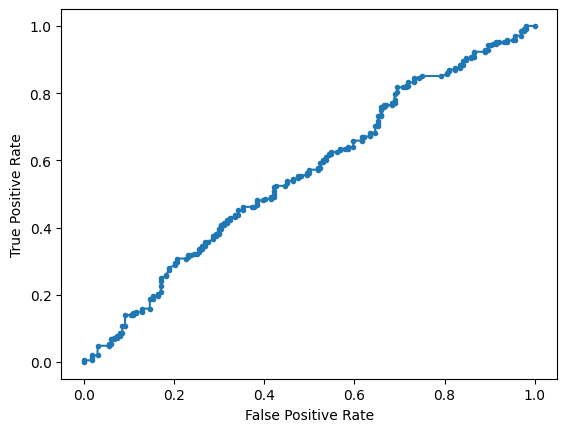

Accuracy: 55.91% Precision: 55.91% Recall: 100.00%
F1: 71.72% MCC: 0.0000
AUPRC: 59.74% AUROC: 55.98%
 accuracy [55.91397849462365]
 precision [55.91397849462365]
 recall [100.0]
 F1 [71.72413793103448]
 MCC [0.0]
 AUPRC [59.74012831850426]
 AUROC [55.975902908067546]

Training # 1 5
2023-04-29 18:33:59.076799
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 745:669 52.69%
Computed class weights: {0: 1.0568011958146488, 1: 0.9489932885906041}
Valid 1:0 177:174 50.43%
FIT


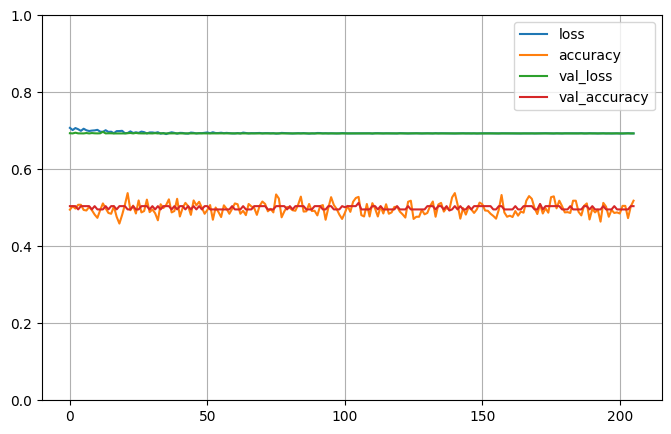


Testing # 1 5
2023-04-29 18:35:22.863841
PREDICT
Test 1:0 177:174 50.43%
Predict 1:0 344:7 98.01%
Test sizes (351, 1025) (351,)
Distrib of scores: 0.5000571 mean 3.0808114e-05 std
Range of scores: 0.49998757 to 0.5001849
Score threshold 0.5
Confusion matrix
 [[  5 169]
 [  2 175]]
Normalized matrix
 [[0.01424501 0.48148148]
 [0.00569801 0.4985755 ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


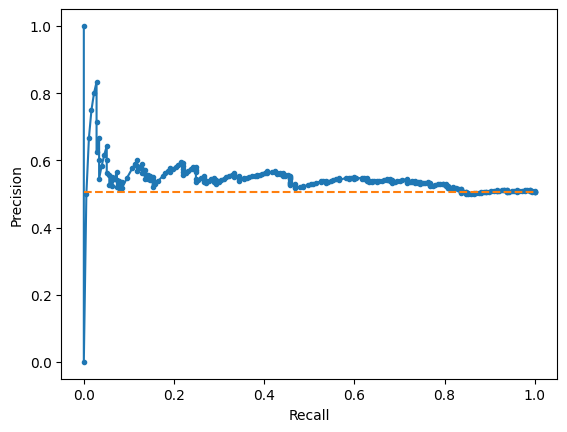

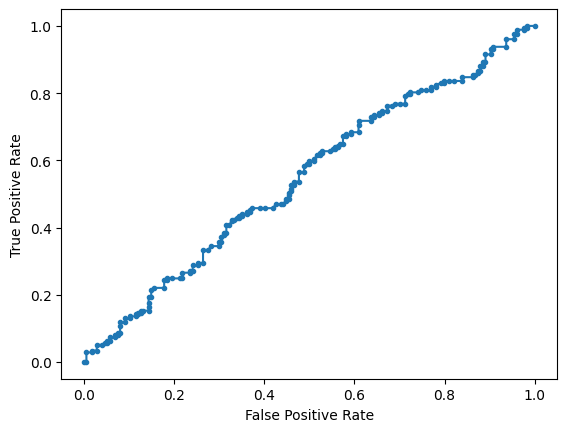

Accuracy: 51.28% Precision: 50.87% Recall: 98.87%
F1: 67.18% MCC: 0.0624
AUPRC: 54.27% AUROC: 54.86%
 accuracy [51.28205128205128]
 precision [50.872093023255815]
 recall [98.87005649717514]
 F1 [67.17850287907869]
 MCC [0.062356938834765306]
 AUPRC [54.26520036755724]
 AUROC [54.85908175855575]

Training # 2 1
2023-04-29 18:35:23.423979
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 747:660 53.09%
Computed class weights: {0: 1.065909090909091, 1: 0.9417670682730924}
Valid 1:0 175:183 48.88%
FIT


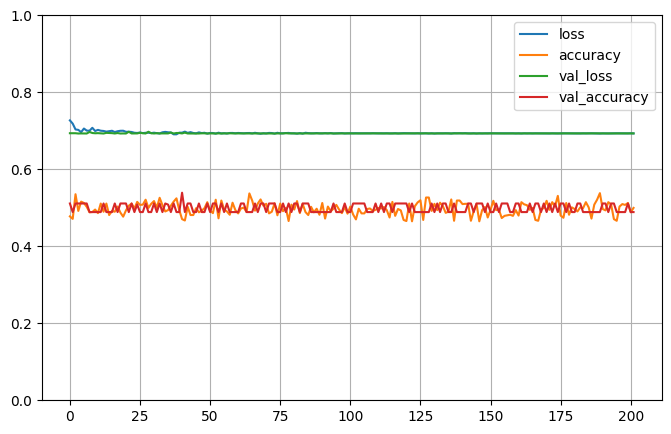


Testing # 2 1
2023-04-29 18:36:11.297957
PREDICT
Test 1:0 175:183 48.88%
Predict 1:0 0:358  0.00%
Test sizes (358, 1025) (358,)
Distrib of scores: 0.4976644 mean 4.7045458e-05 std
Range of scores: 0.49755704 to 0.49784225
Score threshold 0.5
Confusion matrix
 [[183   0]
 [175   0]]
Normalized matrix
 [[0.51117318 0.        ]
 [0.48882682 0.        ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


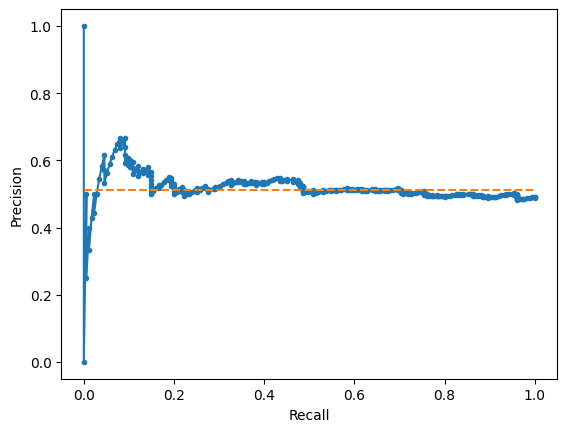

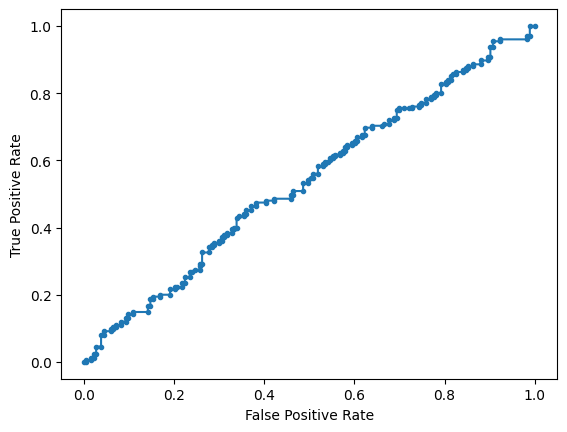

Accuracy: 51.12% Precision: 0.00% Recall: 0.00%
F1: 0.00% MCC: 0.0000
AUPRC: 51.76% AUROC: 53.69%
 accuracy [51.117318435754186]
 precision [0.0]
 recall [0.0]
 F1 [0.0]
 MCC [0.0]
 AUPRC [51.757511413283716]
 AUROC [53.68618266978922]

Training # 2 2
2023-04-29 18:36:11.970715
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 751:675 52.66%
Computed class weights: {0: 1.0562962962962963, 1: 0.9494007989347537}
Valid 1:0 171:168 50.44%
FIT


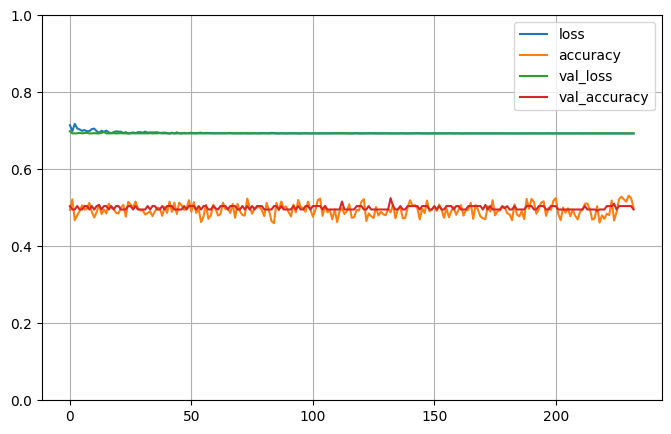


Testing # 2 2
2023-04-29 18:37:07.129320
PREDICT
Test 1:0 171:168 50.44%
Predict 1:0 74:265 21.83%
Test sizes (339, 1025) (339,)
Distrib of scores: 0.4999848 mean 2.175518e-05 std
Range of scores: 0.49991775 to 0.5000642
Score threshold 0.5
Confusion matrix
 [[136  32]
 [129  42]]
Normalized matrix
 [[0.40117994 0.09439528]
 [0.38053097 0.12389381]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


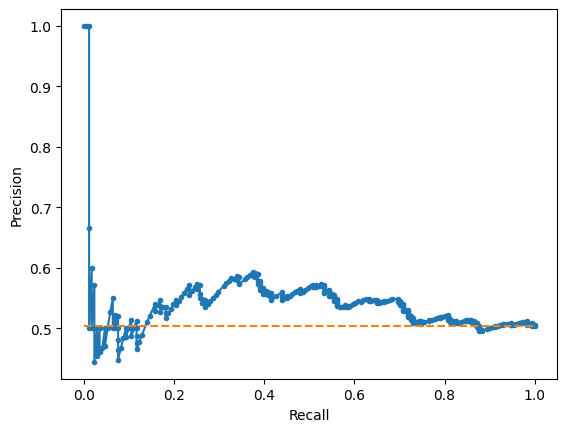

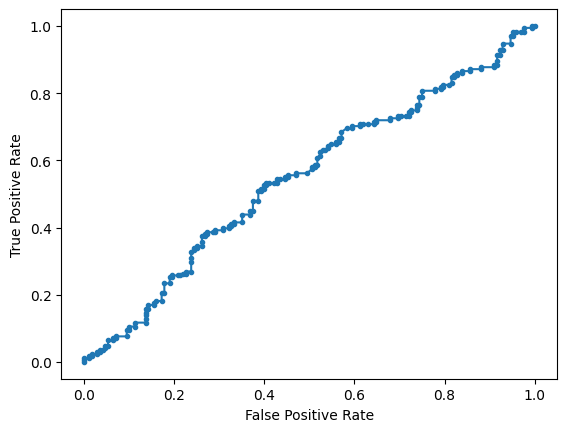

Accuracy: 52.51% Precision: 56.76% Recall: 24.56%
F1: 34.29% MCC: 0.0667
AUPRC: 53.93% AUROC: 54.82%
 accuracy [52.50737463126843]
 precision [56.75675675675676]
 recall [24.561403508771928]
 F1 [34.285714285714285]
 MCC [0.06673653965308667]
 AUPRC [53.932751622290965]
 AUROC [54.815859092174875]

Training # 2 3
2023-04-29 18:37:07.760444
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 721:686 51.24%
Computed class weights: {0: 1.0255102040816326, 1: 0.9757281553398058}
Valid 1:0 201:157 56.15%
FIT


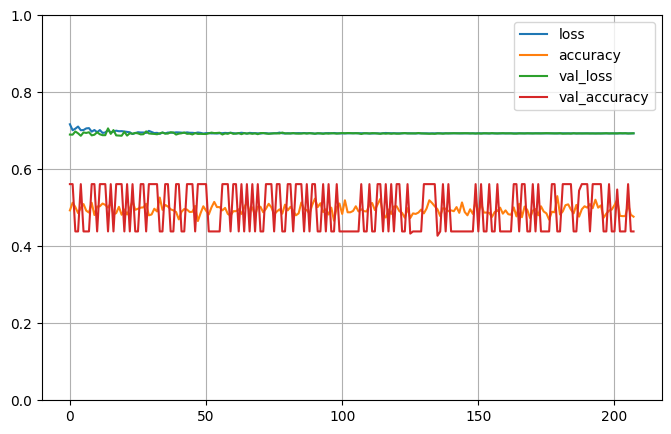


Testing # 2 3
2023-04-29 18:37:59.462226
PREDICT
Test 1:0 201:157 56.15%
Predict 1:0 358:0 100.00%
Test sizes (358, 1025) (358,)
Distrib of scores: 0.50640213 mean 1.454102e-05 std
Range of scores: 0.5063687 to 0.5064573
Score threshold 0.5
Confusion matrix
 [[  0 157]
 [  0 201]]
Normalized matrix
 [[0.         0.43854749]
 [0.         0.56145251]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


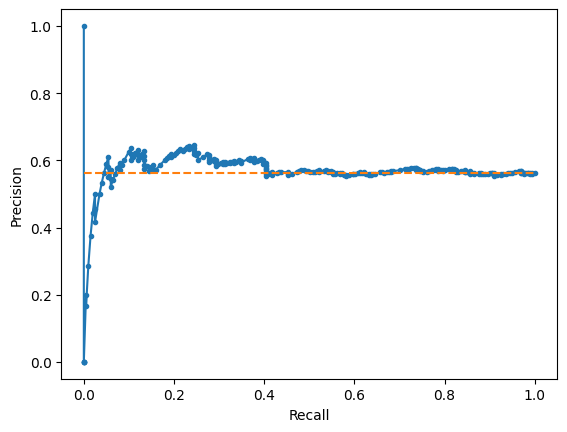

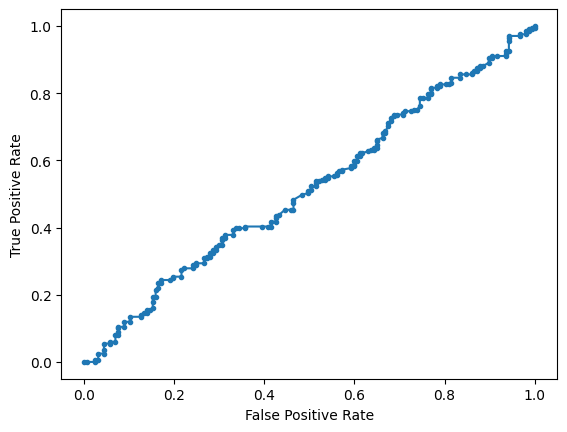

Accuracy: 56.15% Precision: 56.15% Recall: 100.00%
F1: 71.91% MCC: 0.0000
AUPRC: 57.00% AUROC: 51.75%
 accuracy [56.14525139664804]
 precision [56.14525139664804]
 recall [100.0]
 F1 [71.91413237924866]
 MCC [0.0]
 AUPRC [56.999829599620874]
 AUROC [51.75080013943024]

Training # 2 4
2023-04-29 18:37:59.995930
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 736:663 52.61%
Computed class weights: {0: 1.055052790346908, 1: 0.9504076086956522}
Valid 1:0 186:180 50.82%
FIT


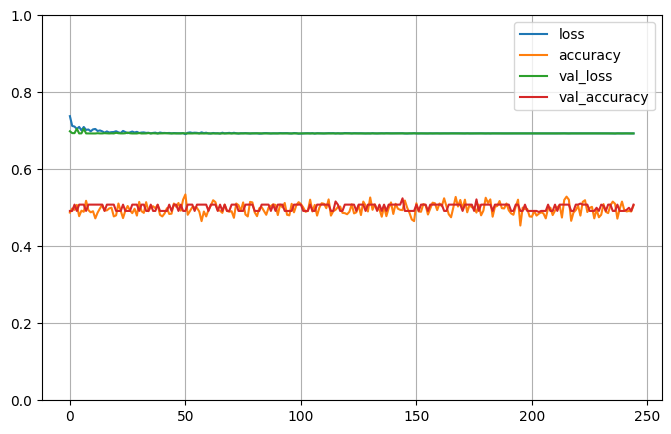


Testing # 2 4
2023-04-29 18:39:23.953555
PREDICT
Test 1:0 186:180 50.82%
Predict 1:0 56:310 15.30%
Test sizes (366, 1025) (366,)
Distrib of scores: 0.49995524 mean 4.735664e-05 std
Range of scores: 0.49983126 to 0.50010115
Score threshold 0.5
Confusion matrix
 [[158  22]
 [152  34]]
Normalized matrix
 [[0.43169399 0.06010929]
 [0.41530055 0.09289617]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


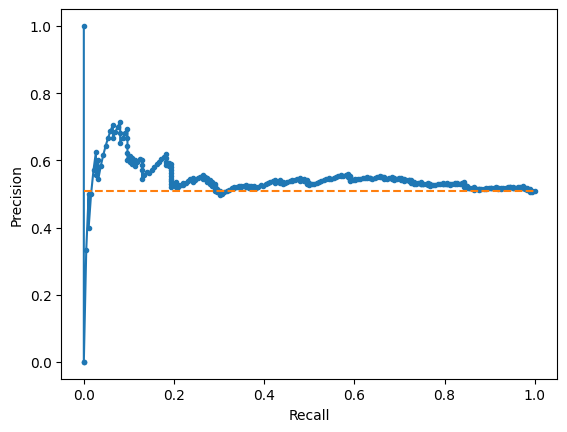

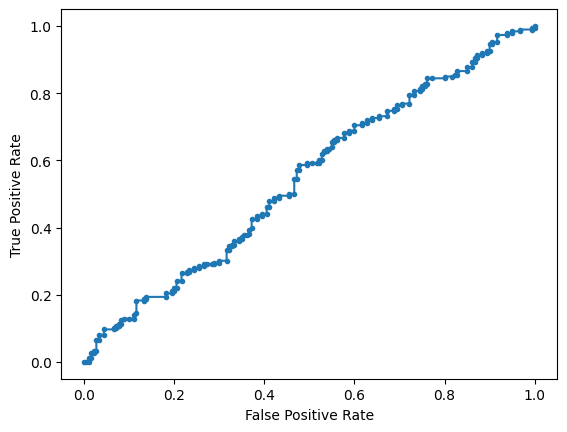

Accuracy: 52.46% Precision: 60.71% Recall: 18.28%
F1: 28.10% MCC: 0.0841
AUPRC: 54.28% AUROC: 54.64%
 accuracy [52.459016393442624]
 precision [60.71428571428571]
 recall [18.27956989247312]
 F1 [28.099173553719016]
 MCC [0.08412021336643075]
 AUPRC [54.284855494028584]
 AUROC [54.63859020310633]

Training # 2 5
2023-04-29 18:39:24.528376
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 733:688 51.58%
Computed class weights: {0: 1.032703488372093, 1: 0.9693042291950886}
Valid 1:0 189:155 54.94%
FIT


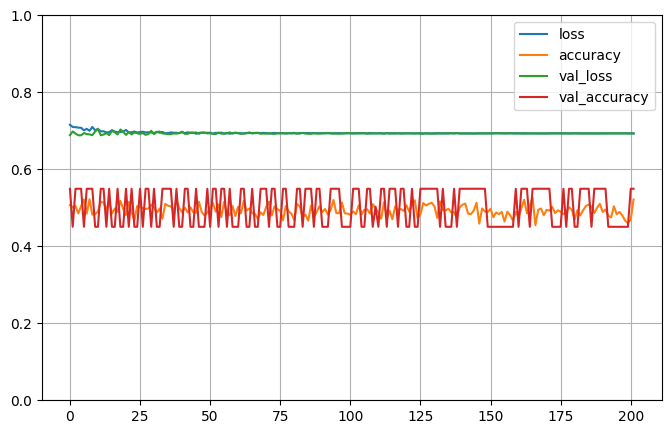


Testing # 2 5
2023-04-29 18:40:15.397705
PREDICT
Test 1:0 189:155 54.94%
Predict 1:0 344:0 100.00%
Test sizes (344, 1025) (344,)
Distrib of scores: 0.5016602 mean 2.1801967e-05 std
Range of scores: 0.50159436 to 0.50172555
Score threshold 0.5
Confusion matrix
 [[  0 155]
 [  0 189]]
Normalized matrix
 [[0.        0.4505814]
 [0.        0.5494186]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


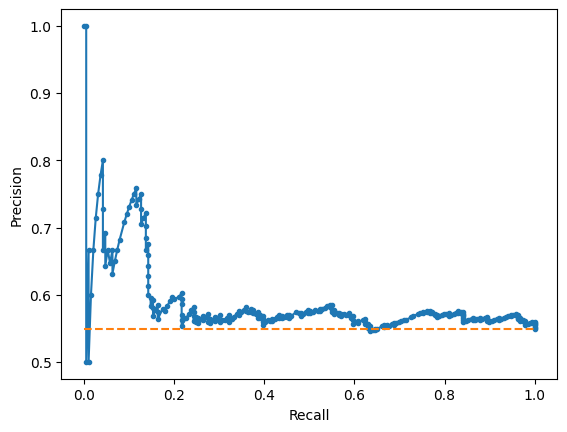

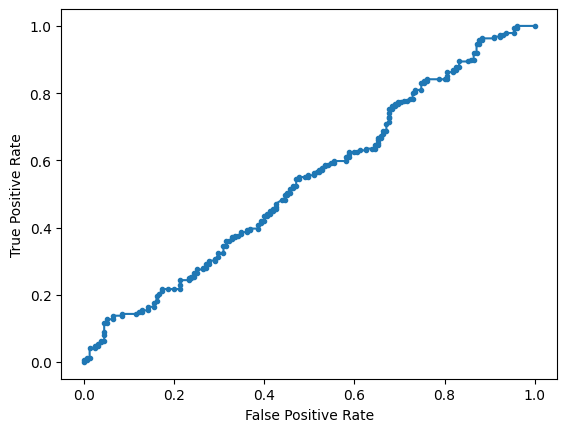

Accuracy: 54.94% Precision: 54.94% Recall: 100.00%
F1: 70.92% MCC: 0.0000
AUPRC: 58.77% AUROC: 53.79%
 accuracy [54.94186046511628]
 precision [54.94186046511628]
 recall [100.0]
 F1 [70.91932457786116]
 MCC [0.0]
 AUPRC [58.76536983808449]
 AUROC [53.79074927462024]
2023-04-29 18:40:15.943399


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 53.03% std 2.22
 precision mean 44.08% std 23.40
 recall mean 64.17% std 46.59
 F1 mean 48.21% std 30.01
 MCC mean 0.0273 std 0.0358
 AUPRC mean 55.29% std 2.99
 AUROC mean 53.96% std 1.33
 accuracy [[50.72886297376093], [54.81927710843374], [50.40871934604905], [55.91397849462365], [51.28205128205128], [51.117318435754186], [52.50737463126843], [56.14525139664804], [52.459016393442624], [54.94186046511628]]
 precision [[50.72886297376093], [54.68277945619335], [0.0], [55.91397849462365], [50.872093023255815], [0.0], [56.75675675675676], [56.14525139664804], [60.71428571428571], [54.94186046511628]]
 recall [[100.0], [100.0], [0.0], [100.0], [98.87005649717514], [0.0], [24.561403508771928], [100.0], [18.27956989247312], [100.0]]
 F1 [[67.31141199226306], [70.703125], [0.0], [71.72413793103448], [67.17850287907869], [0.0], [34.285714285714285], [71.91413237924866], [28.099173553719016], [70.91932457786116]]
 MCC [[0.0], [0.06017787070781678], [0.0], [0.0], [0.062356938834